In [38]:
#from tensorflow import keras
#from tensorflow.python.keras import backend
#from tensorflow.keras.models import Sequential
#import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [39]:
data = pd.read_csv('train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
data.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [41]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img('Images/'+data['Id'][i]+'.jpg',target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:54<00:00, 132.74it/s]


In [42]:
X.shape

(7254, 150, 150, 3)

"['Comedy']"

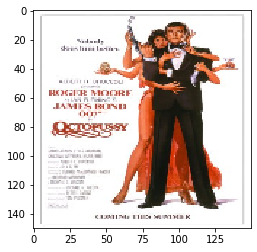

In [67]:
plt.imshow(X[4])
data.Genre[2]

In [44]:
y = np.array(data.drop(['Id','Genre'], axis =1))
y.shape
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4, test_size = 0.25)

In [47]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Conv2D(16, activation="relu", kernel_size=(5, 5), input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(16, activation="relu", kernel_size=(5, 5)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(16, activation="relu", kernel_size=(5, 5)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(16, activation="relu", kernel_size=(5, 5)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(25, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 69, 69, 16)        6416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 16)      

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test), batch_size=8)

Train on 5440 samples, validate on 1814 samples
Epoch 1/20
5440/5440 [==============================] - ETA: 2:20 - loss: 0.2233 - accuracy: 0.92 - ETA: 36s - loss: 0.2539 - accuracy: 0.9080 - ETA: 24s - loss: 0.2417 - accuracy: 0.910 - ETA: 20s - loss: 0.2383 - accuracy: 0.914 - ETA: 17s - loss: 0.2328 - accuracy: 0.916 - ETA: 16s - loss: 0.2299 - accuracy: 0.916 - ETA: 15s - loss: 0.2238 - accuracy: 0.917 - ETA: 14s - loss: 0.2208 - accuracy: 0.918 - ETA: 13s - loss: 0.2224 - accuracy: 0.918 - ETA: 13s - loss: 0.2243 - accuracy: 0.917 - ETA: 12s - loss: 0.2247 - accuracy: 0.916 - ETA: 12s - loss: 0.2261 - accuracy: 0.916 - ETA: 12s - loss: 0.2245 - accuracy: 0.917 - ETA: 11s - loss: 0.2243 - accuracy: 0.916 - ETA: 11s - loss: 0.2250 - accuracy: 0.916 - ETA: 11s - loss: 0.2234 - accuracy: 0.916 - ETA: 10s - loss: 0.2248 - accuracy: 0.916 - ETA: 10s - loss: 0.2251 - accuracy: 0.916 - ETA: 10s - loss: 0.2252 - accuracy: 0.915 - ETA: 10s - loss: 0.2266 - accuracy: 0.915 - ETA: 10s - loss

5440/5440 [==============================] - ETA: 10s - loss: 0.2462 - accuracy: 0.895 - ETA: 9s - loss: 0.2351 - accuracy: 0.904 - ETA: 9s - loss: 0.2181 - accuracy: 0.91 - ETA: 9s - loss: 0.2173 - accuracy: 0.91 - ETA: 9s - loss: 0.2077 - accuracy: 0.92 - ETA: 9s - loss: 0.2100 - accuracy: 0.92 - ETA: 9s - loss: 0.2115 - accuracy: 0.92 - ETA: 9s - loss: 0.2149 - accuracy: 0.91 - ETA: 9s - loss: 0.2160 - accuracy: 0.91 - ETA: 9s - loss: 0.2190 - accuracy: 0.91 - ETA: 9s - loss: 0.2209 - accuracy: 0.91 - ETA: 9s - loss: 0.2227 - accuracy: 0.91 - ETA: 9s - loss: 0.2225 - accuracy: 0.91 - ETA: 8s - loss: 0.2224 - accuracy: 0.91 - ETA: 8s - loss: 0.2222 - accuracy: 0.91 - ETA: 8s - loss: 0.2226 - accuracy: 0.91 - ETA: 8s - loss: 0.2217 - accuracy: 0.91 - ETA: 8s - loss: 0.2206 - accuracy: 0.91 - ETA: 8s - loss: 0.2197 - accuracy: 0.91 - ETA: 8s - loss: 0.2204 - accuracy: 0.91 - ETA: 8s - loss: 0.2202 - accuracy: 0.91 - ETA: 8s - loss: 0.2193 - accuracy: 0.91 - ETA: 8s - loss: 0.2181 - acc

5440/5440 [==============================] - ETA: 10s - loss: 0.1192 - accuracy: 0.975 - ETA: 9s - loss: 0.1889 - accuracy: 0.929 - ETA: 9s - loss: 0.1941 - accuracy: 0.92 - ETA: 9s - loss: 0.2073 - accuracy: 0.92 - ETA: 9s - loss: 0.2125 - accuracy: 0.92 - ETA: 9s - loss: 0.2124 - accuracy: 0.92 - ETA: 9s - loss: 0.2144 - accuracy: 0.92 - ETA: 9s - loss: 0.2124 - accuracy: 0.92 - ETA: 9s - loss: 0.2126 - accuracy: 0.92 - ETA: 9s - loss: 0.2114 - accuracy: 0.92 - ETA: 9s - loss: 0.2116 - accuracy: 0.92 - ETA: 9s - loss: 0.2125 - accuracy: 0.92 - ETA: 9s - loss: 0.2137 - accuracy: 0.92 - ETA: 8s - loss: 0.2115 - accuracy: 0.92 - ETA: 8s - loss: 0.2118 - accuracy: 0.92 - ETA: 8s - loss: 0.2127 - accuracy: 0.92 - ETA: 8s - loss: 0.2137 - accuracy: 0.92 - ETA: 8s - loss: 0.2143 - accuracy: 0.92 - ETA: 8s - loss: 0.2147 - accuracy: 0.91 - ETA: 8s - loss: 0.2153 - accuracy: 0.91 - ETA: 8s - loss: 0.2154 - accuracy: 0.91 - ETA: 8s - loss: 0.2161 - accuracy: 0.91 - ETA: 8s - loss: 0.2153 - acc

5440/5440 [==============================] - ETA: 10s - loss: 0.1694 - accuracy: 0.935 - ETA: 9s - loss: 0.2369 - accuracy: 0.911 - ETA: 9s - loss: 0.2348 - accuracy: 0.91 - ETA: 9s - loss: 0.2276 - accuracy: 0.91 - ETA: 9s - loss: 0.2337 - accuracy: 0.91 - ETA: 9s - loss: 0.2337 - accuracy: 0.91 - ETA: 9s - loss: 0.2306 - accuracy: 0.91 - ETA: 9s - loss: 0.2286 - accuracy: 0.91 - ETA: 9s - loss: 0.2303 - accuracy: 0.91 - ETA: 9s - loss: 0.2305 - accuracy: 0.91 - ETA: 9s - loss: 0.2270 - accuracy: 0.91 - ETA: 9s - loss: 0.2274 - accuracy: 0.91 - ETA: 8s - loss: 0.2269 - accuracy: 0.91 - ETA: 8s - loss: 0.2268 - accuracy: 0.91 - ETA: 8s - loss: 0.2248 - accuracy: 0.91 - ETA: 8s - loss: 0.2247 - accuracy: 0.91 - ETA: 8s - loss: 0.2221 - accuracy: 0.91 - ETA: 8s - loss: 0.2229 - accuracy: 0.91 - ETA: 8s - loss: 0.2227 - accuracy: 0.91 - ETA: 8s - loss: 0.2225 - accuracy: 0.91 - ETA: 8s - loss: 0.2214 - accuracy: 0.91 - ETA: 8s - loss: 0.2213 - accuracy: 0.91 - ETA: 8s - loss: 0.2207 - acc

5440/5440 [==============================] - ETA: 10s - loss: 0.2427 - accuracy: 0.895 - ETA: 10s - loss: 0.2108 - accuracy: 0.912 - ETA: 9s - loss: 0.2123 - accuracy: 0.917 - ETA: 9s - loss: 0.2161 - accuracy: 0.91 - ETA: 9s - loss: 0.2207 - accuracy: 0.91 - ETA: 9s - loss: 0.2204 - accuracy: 0.91 - ETA: 9s - loss: 0.2199 - accuracy: 0.91 - ETA: 9s - loss: 0.2170 - accuracy: 0.91 - ETA: 9s - loss: 0.2210 - accuracy: 0.91 - ETA: 9s - loss: 0.2206 - accuracy: 0.91 - ETA: 9s - loss: 0.2189 - accuracy: 0.91 - ETA: 9s - loss: 0.2161 - accuracy: 0.91 - ETA: 9s - loss: 0.2150 - accuracy: 0.91 - ETA: 9s - loss: 0.2146 - accuracy: 0.91 - ETA: 9s - loss: 0.2178 - accuracy: 0.91 - ETA: 8s - loss: 0.2168 - accuracy: 0.91 - ETA: 8s - loss: 0.2164 - accuracy: 0.91 - ETA: 8s - loss: 0.2177 - accuracy: 0.91 - ETA: 8s - loss: 0.2169 - accuracy: 0.91 - ETA: 8s - loss: 0.2161 - accuracy: 0.91 - ETA: 8s - loss: 0.2156 - accuracy: 0.91 - ETA: 8s - loss: 0.2151 - accuracy: 0.91 - ETA: 8s - loss: 0.2151 - a

5440/5440 [==============================] - ETA: 10s - loss: 0.2337 - accuracy: 0.900 - ETA: 9s - loss: 0.2218 - accuracy: 0.911 - ETA: 9s - loss: 0.2154 - accuracy: 0.91 - ETA: 9s - loss: 0.2153 - accuracy: 0.91 - ETA: 9s - loss: 0.2143 - accuracy: 0.91 - ETA: 9s - loss: 0.2152 - accuracy: 0.91 - ETA: 9s - loss: 0.2184 - accuracy: 0.91 - ETA: 9s - loss: 0.2173 - accuracy: 0.91 - ETA: 9s - loss: 0.2160 - accuracy: 0.91 - ETA: 9s - loss: 0.2176 - accuracy: 0.91 - ETA: 9s - loss: 0.2161 - accuracy: 0.91 - ETA: 9s - loss: 0.2146 - accuracy: 0.91 - ETA: 9s - loss: 0.2137 - accuracy: 0.91 - ETA: 8s - loss: 0.2137 - accuracy: 0.91 - ETA: 8s - loss: 0.2119 - accuracy: 0.91 - ETA: 8s - loss: 0.2122 - accuracy: 0.91 - ETA: 8s - loss: 0.2112 - accuracy: 0.91 - ETA: 8s - loss: 0.2106 - accuracy: 0.91 - ETA: 8s - loss: 0.2109 - accuracy: 0.91 - ETA: 8s - loss: 0.2101 - accuracy: 0.91 - ETA: 8s - loss: 0.2120 - accuracy: 0.91 - ETA: 8s - loss: 0.2114 - accuracy: 0.91 - ETA: 8s - loss: 0.2116 - acc

5440/5440 [==============================] - ETA: 10s - loss: 0.2160 - accuracy: 0.905 - ETA: 9s - loss: 0.2175 - accuracy: 0.918 - ETA: 9s - loss: 0.2142 - accuracy: 0.91 - ETA: 9s - loss: 0.2058 - accuracy: 0.91 - ETA: 9s - loss: 0.2144 - accuracy: 0.91 - ETA: 9s - loss: 0.2176 - accuracy: 0.91 - ETA: 9s - loss: 0.2149 - accuracy: 0.91 - ETA: 9s - loss: 0.2118 - accuracy: 0.91 - ETA: 9s - loss: 0.2126 - accuracy: 0.91 - ETA: 9s - loss: 0.2132 - accuracy: 0.91 - ETA: 9s - loss: 0.2115 - accuracy: 0.91 - ETA: 9s - loss: 0.2111 - accuracy: 0.91 - ETA: 9s - loss: 0.2135 - accuracy: 0.91 - ETA: 9s - loss: 0.2167 - accuracy: 0.91 - ETA: 8s - loss: 0.2153 - accuracy: 0.91 - ETA: 8s - loss: 0.2150 - accuracy: 0.91 - ETA: 8s - loss: 0.2149 - accuracy: 0.91 - ETA: 8s - loss: 0.2149 - accuracy: 0.91 - ETA: 8s - loss: 0.2154 - accuracy: 0.91 - ETA: 8s - loss: 0.2161 - accuracy: 0.91 - ETA: 8s - loss: 0.2166 - accuracy: 0.91 - ETA: 8s - loss: 0.2164 - accuracy: 0.91 - ETA: 8s - loss: 0.2162 - acc

5440/5440 [==============================] - ETA: 10s - loss: 0.1774 - accuracy: 0.925 - ETA: 9s - loss: 0.2234 - accuracy: 0.920 - ETA: 9s - loss: 0.2093 - accuracy: 0.92 - ETA: 9s - loss: 0.2232 - accuracy: 0.91 - ETA: 9s - loss: 0.2212 - accuracy: 0.91 - ETA: 9s - loss: 0.2237 - accuracy: 0.91 - ETA: 9s - loss: 0.2206 - accuracy: 0.91 - ETA: 9s - loss: 0.2214 - accuracy: 0.91 - ETA: 9s - loss: 0.2202 - accuracy: 0.91 - ETA: 9s - loss: 0.2192 - accuracy: 0.91 - ETA: 9s - loss: 0.2186 - accuracy: 0.91 - ETA: 9s - loss: 0.2192 - accuracy: 0.91 - ETA: 9s - loss: 0.2193 - accuracy: 0.91 - ETA: 9s - loss: 0.2163 - accuracy: 0.91 - ETA: 9s - loss: 0.2146 - accuracy: 0.91 - ETA: 8s - loss: 0.2149 - accuracy: 0.91 - ETA: 8s - loss: 0.2169 - accuracy: 0.91 - ETA: 8s - loss: 0.2168 - accuracy: 0.91 - ETA: 8s - loss: 0.2154 - accuracy: 0.91 - ETA: 8s - loss: 0.2154 - accuracy: 0.91 - ETA: 8s - loss: 0.2137 - accuracy: 0.91 - ETA: 8s - loss: 0.2136 - accuracy: 0.91 - ETA: 8s - loss: 0.2135 - acc

5440/5440 [==============================] - ETA: 10s - loss: 0.1762 - accuracy: 0.935 - ETA: 10s - loss: 0.2006 - accuracy: 0.917 - ETA: 9s - loss: 0.1985 - accuracy: 0.918 - ETA: 9s - loss: 0.2040 - accuracy: 0.92 - ETA: 9s - loss: 0.2046 - accuracy: 0.92 - ETA: 9s - loss: 0.2079 - accuracy: 0.91 - ETA: 9s - loss: 0.2073 - accuracy: 0.91 - ETA: 9s - loss: 0.2063 - accuracy: 0.91 - ETA: 9s - loss: 0.2075 - accuracy: 0.91 - ETA: 9s - loss: 0.2089 - accuracy: 0.91 - ETA: 9s - loss: 0.2111 - accuracy: 0.91 - ETA: 9s - loss: 0.2109 - accuracy: 0.91 - ETA: 9s - loss: 0.2110 - accuracy: 0.91 - ETA: 9s - loss: 0.2123 - accuracy: 0.91 - ETA: 9s - loss: 0.2109 - accuracy: 0.91 - ETA: 9s - loss: 0.2097 - accuracy: 0.91 - ETA: 9s - loss: 0.2114 - accuracy: 0.91 - ETA: 8s - loss: 0.2119 - accuracy: 0.91 - ETA: 8s - loss: 0.2105 - accuracy: 0.91 - ETA: 8s - loss: 0.2099 - accuracy: 0.91 - ETA: 8s - loss: 0.2131 - accuracy: 0.91 - ETA: 8s - loss: 0.2128 - accuracy: 0.91 - ETA: 8s - loss: 0.2134 - a

5440/5440 [==============================] - ETA: 10s - loss: 0.2485 - accuracy: 0.910 - ETA: 9s - loss: 0.2173 - accuracy: 0.915 - ETA: 9s - loss: 0.2089 - accuracy: 0.91 - ETA: 9s - loss: 0.2017 - accuracy: 0.91 - ETA: 9s - loss: 0.2014 - accuracy: 0.91 - ETA: 9s - loss: 0.2057 - accuracy: 0.91 - ETA: 9s - loss: 0.2058 - accuracy: 0.91 - ETA: 9s - loss: 0.2077 - accuracy: 0.91 - ETA: 9s - loss: 0.2075 - accuracy: 0.91 - ETA: 9s - loss: 0.2053 - accuracy: 0.91 - ETA: 9s - loss: 0.2053 - accuracy: 0.91 - ETA: 9s - loss: 0.2036 - accuracy: 0.92 - ETA: 9s - loss: 0.2034 - accuracy: 0.92 - ETA: 9s - loss: 0.2027 - accuracy: 0.92 - ETA: 8s - loss: 0.2054 - accuracy: 0.91 - ETA: 8s - loss: 0.2043 - accuracy: 0.92 - ETA: 8s - loss: 0.2046 - accuracy: 0.92 - ETA: 8s - loss: 0.2026 - accuracy: 0.92 - ETA: 8s - loss: 0.2036 - accuracy: 0.92 - ETA: 8s - loss: 0.2041 - accuracy: 0.92 - ETA: 8s - loss: 0.2046 - accuracy: 0.92 - ETA: 8s - loss: 0.2044 - accuracy: 0.92 - ETA: 8s - loss: 0.2047 - acc

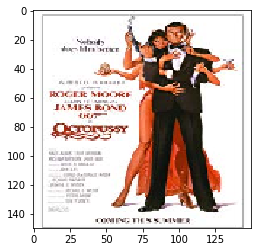

In [69]:
img = image.load_img('octoctoct.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)

Comedy (0.451)
Drama (0.3)
Romance (0.266)


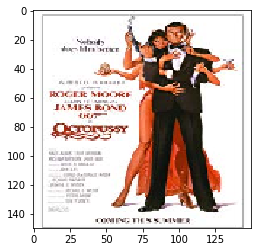

In [70]:
classes = np.array(data.columns[2:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)